In [ ]:
'''
    * Being one of the subcategories of supervised learning,
    Regression is used to predict the future.
    
    * While Classification's purpose is to classify potential subsets,
    Regression predicts X -> Y.
'''

## Preparing Data

In [1]:
import pandas as pd

In [2]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

In [3]:
df = pd.read_csv("http://jse.amstat.org/v19n3/decock/AmesHousing.txt", sep="\t", usecols = columns )

In [4]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [6]:
df.shape

(2930, 6)

In [8]:
df["Central Air"] = df["Central Air"].map({"N":0, "Y":1})

In [11]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [13]:
df.dropna(axis = 1)

,Overall Qual,Overall Cond,Central Air,Gr Liv Area,SalePrice
0,6,5,1,1656,215000
1,5,6,1,896,105000
2,6,6,1,1329,172000
3,7,5,1,2110,244000
4,5,5,1,1629,189900
...,...,...,...,...,...
2925,6,6,1,1003,142500
2926,5,5,1,902,131000
2927,5,5,1,970,132000
2928,5,5,1,1389,170000


## Exploratory Data Analysis ( EDA )

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

In [ ]:
'''
    * One way to visualize dimensions is to plot a matrix that 
    corresponds to each feature vs. the other.
'''

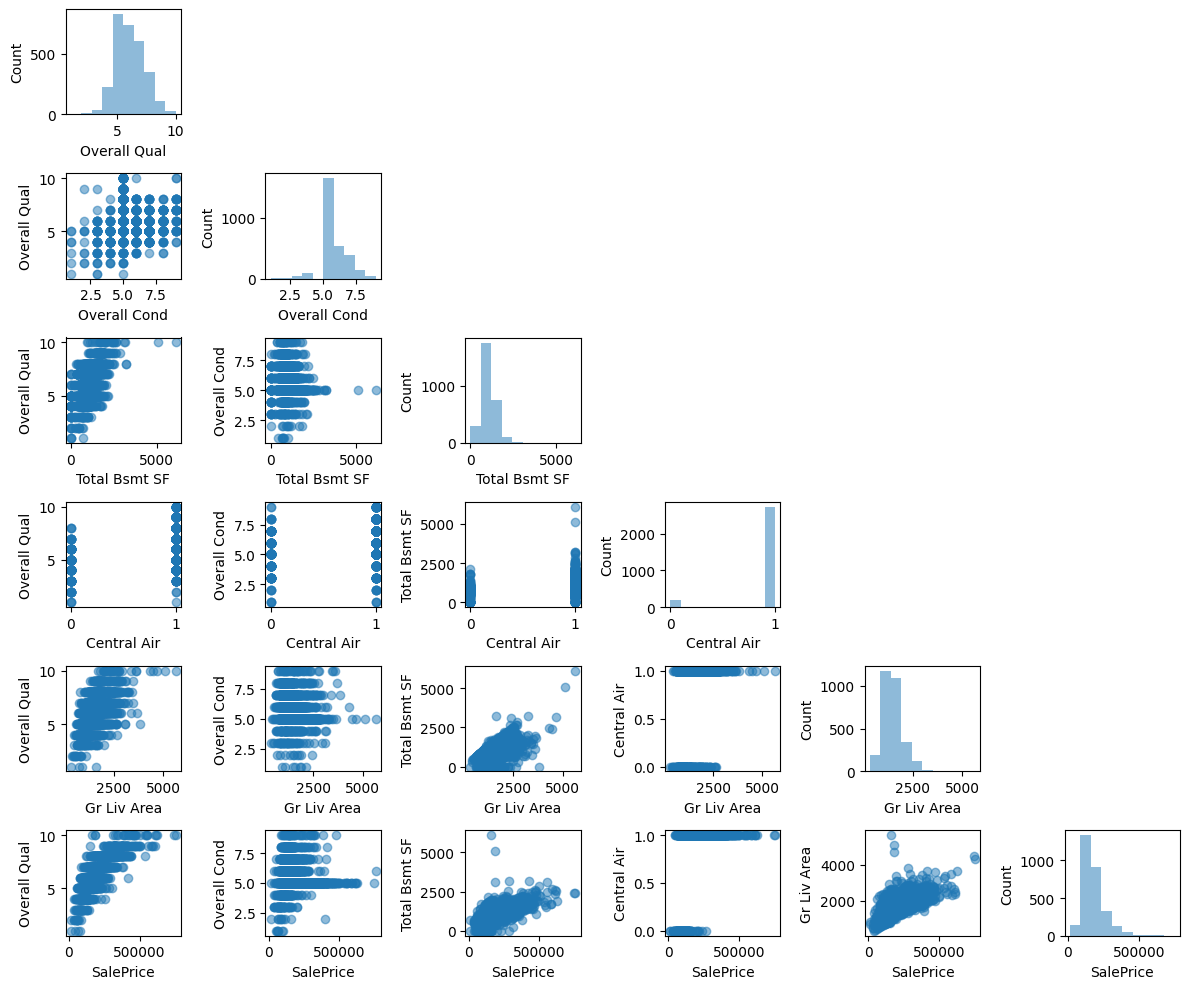

In [16]:
scatterplotmatrix(df.values, figsize=(12,10), names=df.columns, alpha=0.5 )
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
from mlxtend.plotting import heatmap

In [18]:
coef = np.corrcoef( df.values.T )

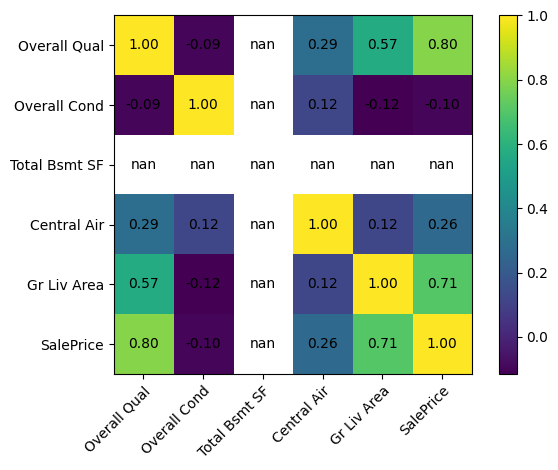

In [23]:
hm = heatmap( coef, row_names=df.columns, column_names=df.columns )
plt.tight_layout()
plt.show()

## Ordinary Least Squares ( OLS )

In [112]:
class LinearRegressionGD:
    
    def __init__( self, eta = 0.1, n_epoch = 10, random_state = 0 ):
        self.eta = eta
        self.random_state = random_state
        self.state = np.random.RandomState(self.random_state)
        self.epoch = n_epoch
        self.losses = []
    
    def fit( self, X, y ):
        self.w_ = self.state.normal(loc = 0.0, scale = 1, size = X.shape[1])
        self.b_ = np.array([0.])
        for _ in range(self.epoch):
            output = self.predict(X)
            resids = y - output
            error = np.sum(resids**2) / X.shape[0]
            self.losses.append(error)
            # print("error.shape : ", error.shape )
            # print("error: ", error )
            # print("X.T.shape : ", X.T.shape )
            self.w_ += 2.0 * self.eta * X.T.dot(resids) / X.shape[0]
            self.b_ += 2.0 * self.eta * resids.mean()
            
        
    def predict( self, X ):
        return (np.dot( X, self.w_.T ) + self.b_)
        

In [65]:
X = df[["Gr Liv Area"]].values
y = df[["SalePrice"]].values

In [40]:
from sklearn.preprocessing import StandardScaler

In [49]:
sc1 = StandardScaler()
sc2 = StandardScaler()

In [103]:
X_std = sc1.fit_transform(X)
y_std = sc2.fit_transform(y).flatten()

In [113]:
lr = LinearRegressionGD(eta=0.1)

In [114]:
lr.fit( X_std, y_std )

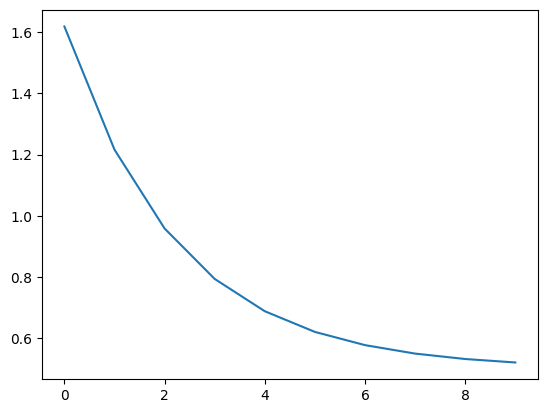

In [117]:
plt.plot( range(lr.epoch), lr.losses )
plt.show()

In [118]:
def lin_regplot( X, y, model ):
    plt.scatter( X, y, c="steelblue", edgecolor="white", s=70 )
    plt.plot( X, model.predict(X), color="black", lw=2 )

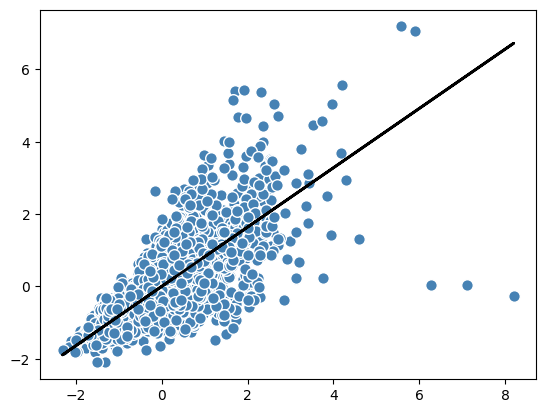

In [119]:
lin_regplot(X_std, y_std, lr)

In [128]:
feature_std = sc1.fit_transform( np.array( [[2500]] ))
target_std = lr.predict(feature_std)
target = sc2.inverse_transform([target_std])

In [136]:
target.flatten()[0]

180796.0600682594

In [ ]:
'''
    Side Note: Because we are working with standardized data,
    there is no need to update the bias. It will be 0 all the 
    time. The line's intercept will be at the origin.
'''

In [138]:
print(f"bias: {lr.b_[0]:.3f}")

bias: -0.000


In [143]:
from sklearn.linear_model import LinearRegression as s_lr

In [144]:
lr2 = s_lr()
lr2.fit( X, y )

LinearRegression()

In [146]:
lr2.intercept_[0]

13289.63436475955

In [145]:
lr2.coef_[0]

array([111.69400086])

Text(0, 0.5, 'Price')

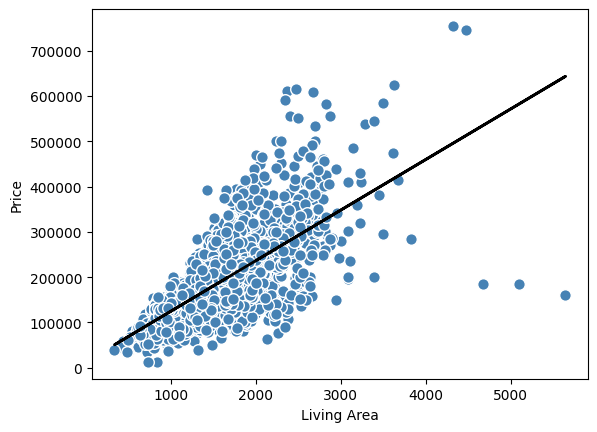

In [148]:
lin_regplot( X, y, lr2 )
plt.xlabel("Living Area")
plt.ylabel("Price")

In [ ]:
'''
    Because Linear Regressors are prone to error due to the outliers, 
    we can use methods like RANSAC to, mitigate this effect.
'''

In [154]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

In [157]:
ran = RANSACRegressor( estimator= LinearRegression(), min_samples=0.95, random_state=0, residual_threshold=None )

In [158]:
ran.fit(X,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95, random_state=0)

In [160]:
inlier_mask = ran.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [161]:
line_X = np.arange( 3,10,1 )

In [162]:
line_y_ran = ran.predict( line_X[:, np.newaxis] )

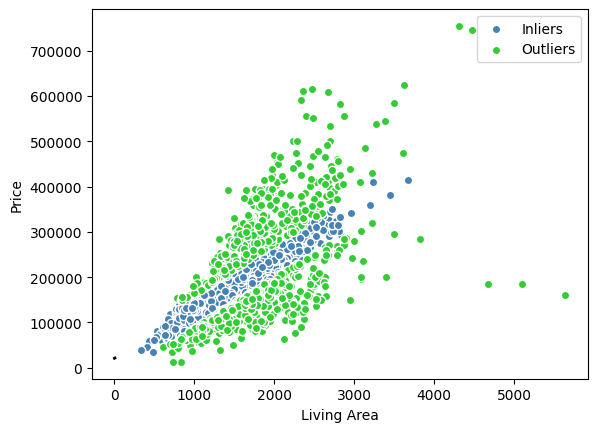

In [174]:
plt.scatter( X[inlier_mask], y[inlier_mask], c="steelblue", edgecolors="white", label="Inliers" )
plt.scatter( X[outlier_mask], y[outlier_mask], c="limegreen", edgecolors="white", label="Outliers")
plt.plot(line_X, line_y_ran, lw = 2, color = "black")
plt.legend(loc="best")
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.show()

## Evaluating LRs

In [175]:
from sklearn.model_selection import train_test_split

In [197]:
df.isnull().sum()
df.dropna( axis = 1, inplace=True )

In [199]:
target = "SalePrice"
features = df.columns[ df.columns != target ]

In [200]:
X = df[features].values
y = df[target].values

In [201]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0 )

In [202]:
s_lr = LinearRegression()

In [210]:
s_lr.fit( X_train, y_train )
y_pred_test = s_lr.predict( X_test  )
y_pred_train = s_lr.predict( X_train )

In [211]:
x_max = np.max([ np.max(y_pred_test), np.max(y_pred_test) ])
x_min = np.min([ np.min(y_pred_test), np.min(y_pred_test) ])

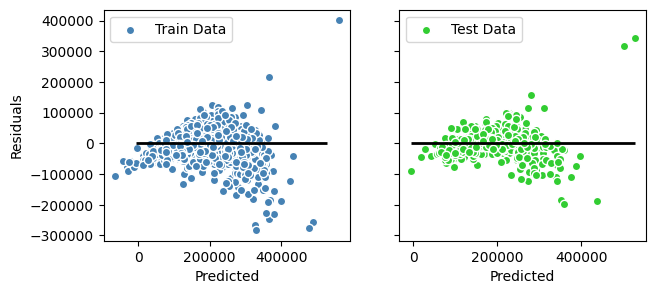

In [231]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(7,3), sharey=True )
ax1.scatter( y_pred_train, y_pred_train - y_train, color="steelblue", edgecolors="white", label="Train Data" )
ax2.scatter( y_pred_test, y_pred_test - y_test, color="limegreen", edgecolors="white", label="Test Data" )
ax1.set_ylabel('Residuals')
for ax in (ax1,ax2):
    ax.set_xlabel("Predicted")
    ax.hlines( y = 0, xmin = x_min - 100, xmax = x_max + 100, colors="black", lw = 2)
    ax.legend(loc='best')
plt.show()

In [233]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error( y_true=y_train, y_pred=y_pred_train ) 
mse_test = mean_squared_error( y_true=y_test, y_pred=y_pred_test ) 

In [234]:
mse_train

1656084253.0152822

In [235]:
mse_test

1838789220.931314

In [236]:
from sklearn.metrics import mean_absolute_error
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
mae_test  = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)

In [238]:
mae_train

28511.48746104051

In [237]:
mae_test

28901.943080224326

In [ ]:
'''
    The score R2 ( R squared ) is quite useful for.
    It is called coefficient of determination.
'''

In [241]:
from sklearn.metrics import r2_score

train_r2 = r2_score( y_pred=y_pred_train, y_true=y_train )
test_r2  = r2_score( y_pred=y_pred_test, y_true=y_test )

print("Train R2: ", train_r2 )
print("Test R2: ", test_r2 )

Train R2:  0.7384364400252299
Test R2:  0.7199186133736377


Because our train's R2 value is bigger than that of test's, we can assume that our model is overfitting a little bit

## Regularized Methods

In [ ]:
'''
    * Ridge Regression : We simply add the squared sum of the weights to the MSE
    loss function.

    * LASSO : One of the methods that results in 0 weights, which makes it suitable
    for feature selection in supervised learning. One of its disadvantages is that
    it will decrease the number of features. This particular thing makes the model
    immuned to overparametrization, i.e saturiation.

    * ElasticNet : A middle-ground between Ridge and LASSO.
    
'''

## Curve Regression

In [273]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [262]:
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0 ])[:, np.newaxis]

In [263]:
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [275]:
lr = LinearRegression()
pr = LinearRegression()

In [276]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

In [278]:
lr.fit(X,y)
X_fit = np.arange(250,600,10)[:,np.newaxis]
pr.fit(X_quad,y)
y_linfit = lr.predict(X_fit)
y_quadfit = pr.predict(quadratic.fit_transform(X_fit))

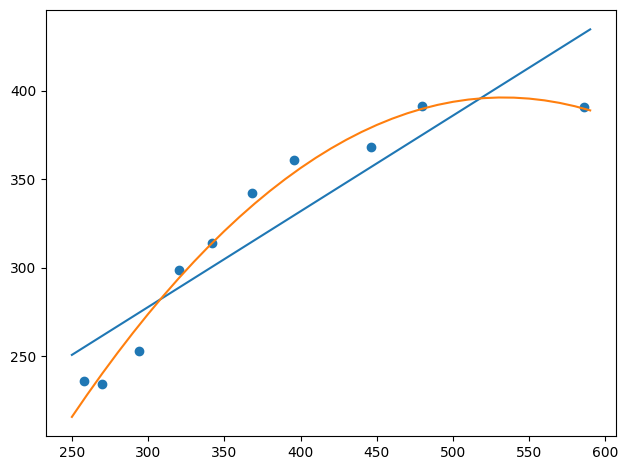

In [285]:
plt.plot( X_fit, y_linfit )
plt.plot( X_fit, y_quadfit )
plt.scatter( X, y )
plt.tight_layout()
plt.show()

## Ames Housing ( Polynomial )

In [287]:
df

,Overall Qual,Overall Cond,Central Air,Gr Liv Area,SalePrice
0,6,5,1,1656,215000
1,5,6,1,896,105000
2,6,6,1,1329,172000
3,7,5,1,2110,244000
4,5,5,1,1629,189900
...,...,...,...,...,...
2925,6,6,1,1003,142500
2926,5,5,1,902,131000
2927,5,5,1,970,132000
2928,5,5,1,1389,170000


In [300]:
X = df[["Gr Liv Area"]].values
y = df["SalePrice"].values

In [298]:
X = X[ (df["Gr Liv Area"] < 4000) ]
y = y[ (df["Gr Liv Area"] < 4000) ]